In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [12]:
df = pd.read_csv("C:\\Users\\vemul\\Machine Learning\\CSV Files\\Iris.csv")

#sets the Id as the index
df.set_index("Id", inplace=True)

In [13]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [66]:
#X is the features and Y is the variable we are predicting
X = df.iloc[:, 0:4]
Y = df.iloc[:, 4]

In [206]:
#split data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
23,4.6,3.6,1.0,0.2
16,5.7,4.4,1.5,0.4
66,6.7,3.1,4.4,1.4
12,4.8,3.4,1.6,0.2
43,4.4,3.2,1.3,0.2


Decision Tree Classifier

In [207]:
from sklearn.tree import DecisionTreeClassifier

In [208]:
dtc = DecisionTreeClassifier(random_state = 42)

In [209]:
dtc.fit(X_train, Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


[Text(0.3076923076923077, 0.9285714285714286, 'x[2] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.2692307692307693, 0.8571428571428572, 'True  '),
 Text(0.38461538461538464, 0.7857142857142857, 'x[2] <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.34615384615384615, 0.8571428571428572, '  False'),
 Text(0.15384615384615385, 0.6428571428571429, 'x[3] <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6153846153846154, 0.6428571428571429, 'x[3] <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]'),
 Text(0.38461538461538464, 0.5, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.3076923076923077, 0.35714285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 2,

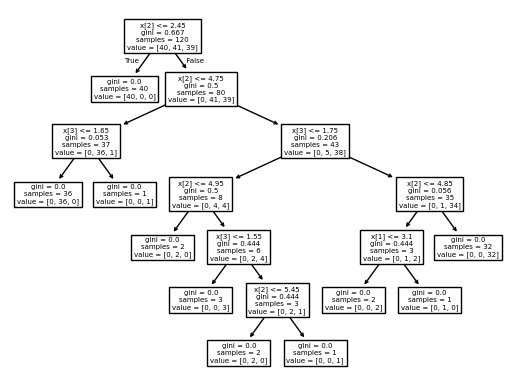

In [210]:
tree.plot_tree(dtc)

Evalutate the model

In [211]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Y_pred = dtc.predict(X_test)

In [213]:
print("Accuracy:", accuracy_score(Y_test,
                                  Y_pred))

Accuracy: 1.0


In [17]:
print("Precision:", precision_score(Y_test,
                                    Y_pred,
                                    average="weighted"))

print('Recall:', recall_score(Y_test,
                              Y_pred,
                              average="weighted"))

Precision: 1.0
Recall: 1.0


In [19]:
print('F1 score:', f1_score(Y_test, Y_pred,
                            average="weighted"))

F1 score: 1.0


In [22]:
cm = confusion_matrix(Y_test, Y_pred, labels = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"])

<Axes: >

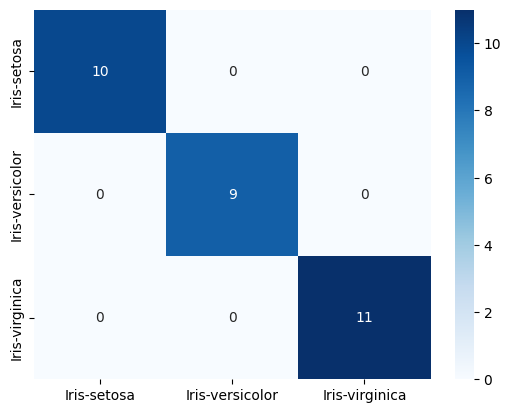

In [36]:
label = ["Iris-setosa", "Iris-versicolor", "Iris-virginica"]
cm_df = pd.DataFrame(cm, index = label, columns = label)

sns.heatmap(cm_df, annot = True, fmt="d", cmap = "Blues")

Random Forest

In [5]:
rf = RandomForestClassifier()

In [6]:
rf.fit(X_train, Y_train)

RandomForestClassifier()

In [9]:
y_pred = rf.predict(X_test)

In [13]:
rf.score(X_test, Y_test)

1.0

In [17]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Softmax regression

In [156]:
Y_train = Y_train.map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})
Y_test = Y_test.map({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2})

In [191]:
Y_train

Id
23     0
16     0
66     1
12     0
43     0
      ..
72     1
107    2
15     0
93     1
103    2
Name: Species, Length: 120, dtype: int64

In [199]:
tf.random.set_seed(42)
model = Sequential([
    Dense(4, activation = "relu", name = "L1"),
    Dense(3, activation = "relu", name = "L2"),
    Dense(3, activation = "linear", name = "L3")
]
)

In [200]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(X_train, Y_train, epochs = 200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 3.1364 
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.9395
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8173
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7163 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.6261 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5423
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4630
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.3869
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.3133
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2418
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1722
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1045
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.0385
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.9744
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9121
Epoch 16/200
4/4 ━

In [201]:
prediction = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step


In [202]:
prediction[0]

array([-3.2580311 ,  0.26217246,  0.45813924], dtype=float32)

In [203]:
prediction_index = np.argmax(prediction, axis=1)

In [204]:
prediction_index

array([2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 1, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [205]:
accuracy = accuracy_score(Y_test, prediction_index)
accuracy

0.7333333333333333